# Neural Network

In [82]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, log_loss
import math
from sklearn.preprocessing import LabelEncoder
!pip install scikit-plot
import scikitplot as skplt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import time

In [83]:
df = pd.read_csv('/content/Project.csv')
df.head()

,c/c++,java,python,wt,dbms,se,ds,algo,math,stats,project
0,4,4,4,3,4,4,4,4,4,4,AI
1,4,3,4,3,5,5,4,3,3,4,AI
2,3,3,3,3,3,5,5,5,2,4,WA
3,4,3,5,3,4,5,3,3,4,4,Cloud
4,5,2,5,3,4,5,5,5,3,3,Others


In [84]:
X = df.drop(columns=(['project']))
y = df['project']  
le = LabelEncoder()
y = le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [85]:
model = Sequential()
model.add(Dense(20, input_dim=X.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=2)

yhat = model.predict(X_test)
y_pred = np.argmax(yhat, axis=-1).astype('int')

Epoch 1/1000
10/10 - 0s - loss: 2.6542 - 394ms/epoch - 39ms/step
Epoch 2/1000
10/10 - 0s - loss: 2.3164 - 21ms/epoch - 2ms/step
Epoch 3/1000
10/10 - 0s - loss: 2.0640 - 23ms/epoch - 2ms/step
Epoch 4/1000
10/10 - 0s - loss: 1.9284 - 25ms/epoch - 2ms/step
Epoch 5/1000
10/10 - 0s - loss: 1.8581 - 24ms/epoch - 2ms/step
Epoch 6/1000
10/10 - 0s - loss: 1.8180 - 23ms/epoch - 2ms/step
Epoch 7/1000
10/10 - 0s - loss: 1.7951 - 25ms/epoch - 2ms/step
Epoch 8/1000
10/10 - 0s - loss: 1.7714 - 33ms/epoch - 3ms/step
Epoch 9/1000
10/10 - 0s - loss: 1.7555 - 19ms/epoch - 2ms/step
Epoch 10/1000
10/10 - 0s - loss: 1.7426 - 24ms/epoch - 2ms/step
Epoch 11/1000
10/10 - 0s - loss: 1.7316 - 27ms/epoch - 3ms/step
Epoch 12/1000
10/10 - 0s - loss: 1.7247 - 20ms/epoch - 2ms/step
Epoch 13/1000
10/10 - 0s - loss: 1.7150 - 27ms/epoch - 3ms/step
Epoch 14/1000
10/10 - 0s - loss: 1.7077 - 25ms/epoch - 3ms/step
Epoch 15/1000
10/10 - 0s - loss: 1.7011 - 38ms/epoch - 4ms/step
Epoch 16/1000
10/10 - 0s - loss: 1.6952 - 63ms/

In [86]:
print("Obtained accuracy of KNN Algorithm  : ",round(accuracy_score(y_pred,y_test)*100,2),"%")
print("R2 Value                            :",round(r2_score(y_test,y_pred),2))
print("Log loss                            : ",round(log_loss(y_test, model.predict(X_test)),2))
print("Mean Squared Error                  : ",round(mean_squared_error(y_test,y_pred),2))

Obtained accuracy of KNN Algorithm  :  38.75 %
R2 Value                            : -0.44
Log loss                            :  2.14
Mean Squared Error                  :  9.24


In [87]:
# Confusion Matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[ 8,  0,  0,  1,  5,  0,  8],
       [ 1,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  3,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  1,  0,  1,  0,  5],
       [ 4,  0,  0,  0,  0,  2,  6],
       [ 3,  0,  0,  1,  4,  2, 20]])

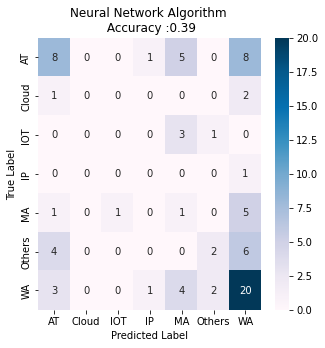

In [88]:
#Heatmap

cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm, index = ['AT','Cloud','IOT','IP','MA','Others','WA'],
                         columns = ['AT','Cloud','IOT','IP','MA','Others','WA'])
plt.figure(figsize=(5,5))
sns.heatmap(cm_df,annot=True, cmap='PuBu')
plt.title('Neural Network Algorithm \n Accuracy :{0:.2f}'.format(accuracy_score(y_test,y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [89]:
# Classification Report
print("Classification Report \n",classification_report(y_test, y_pred,target_names = ['AT','Cloud','IOT','IP','MA','Others','WA']))

Classification Report 
               precision    recall  f1-score   support

          AT       0.47      0.36      0.41        22
       Cloud       0.00      0.00      0.00         3
         IOT       0.00      0.00      0.00         4
          IP       0.00      0.00      0.00         1
          MA       0.08      0.12      0.10         8
      Others       0.40      0.17      0.24        12
          WA       0.48      0.67      0.56        30

    accuracy                           0.39        80
   macro avg       0.20      0.19      0.19        80
weighted avg       0.38      0.39      0.37        80



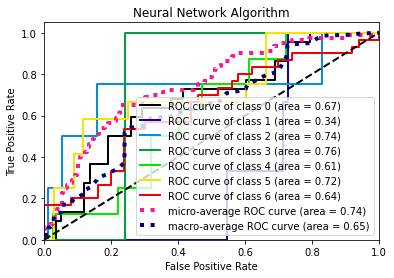

In [90]:
#ROC Curve

skplt.metrics.plot_roc_curve(y_test, model.predict(X_test))
plt.title("Neural Network Algorithm")
plt.show()

In [92]:
#Prediction

input1 = [3,4,5,2,4,5,3,4,5,3]
input2 = [5,5,5,1,4,5,3,5,5,3]
input3 = [4,4,2,1,4,2,2,1,1,1]
input4 = [4,4,2,1,4,2,2,1,1,1]
input5 = [1,4,2,1,1,2,2,1,1,1]
input6 = [5,5,5,3,2,2,2,5,2,5]
input7 = [5,5,2,1,2,2,2,1,1,1]
inputs = [input1,input2,input3,input4,input5,input6,input7]
for input in inputs:
    print("Input  : ",input)
    input = np.reshape(input,(1,10))
    cls = model.predict(input)
    cls = np.argmax(cls, axis=-1).astype('int')
    y_pred = np.argmax(yhat, axis=-1).astype('int')
    if cls == 0:
        print("Output :  AI")
    elif cls == 1:
        print("Output :  Cloud")
    elif cls == 2:
        print("Output :  IOT")
    elif cls == 3:
        print("Output :  IP")
    elif cls == 4:
        print("Output :  MA")
    elif cls==5:
        print("Output :  Others")
    else:
        print("Output :  WA")

Input  :  [3, 4, 5, 2, 4, 5, 3, 4, 5, 3]
Output :  AI
Input  :  [5, 5, 5, 1, 4, 5, 3, 5, 5, 3]
Output :  MA
Input  :  [4, 4, 2, 1, 4, 2, 2, 1, 1, 1]
Output :  IP
Input  :  [4, 4, 2, 1, 4, 2, 2, 1, 1, 1]
Output :  IP
Input  :  [1, 4, 2, 1, 1, 2, 2, 1, 1, 1]
Output :  IP
Input  :  [5, 5, 5, 3, 2, 2, 2, 5, 2, 5]
Output :  IP
Input  :  [5, 5, 2, 1, 2, 2, 2, 1, 1, 1]
Output :  Cloud


In [93]:
def predict(a):
    print("Ratings : ",a)
    a = np.reshape(a,(1,10))
    cls = model.predict(a)
    cls = np.argmax(cls, axis=-1).astype('int')  
    if cls == 0:
        return "AI"
    elif cls == 1:
        return "Cloud"
    elif cls == 2:
        return "IOT"
    elif cls == 3:
        return "IP"
    elif cls == 4:
        return "MA"
    elif cls==5:
        return "Others"
    else:
        return "WA"

In [94]:
input = [5,4,3,2,4,3,2,5,4,3]
predict(input)

Ratings :  [5, 4, 3, 2, 4, 3, 2, 5, 4, 3]


'MA'